In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pm4py
import numpy as np
import datetime
pd.set_option("display.max_rows", None)
from collections import Counter
import operator
import pickle

In [2]:
# log = pm4py.read_xes('./BPI_Challenge_2012.xes.gz')
# df = pm4py.convert_to_dataframe(log)
# 244190*0.3

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/NickSot/process_mining/main/BPI_2012.csv')
print('DataFrame size: {}'.format(len(df)))
print('DataFrame without nulls size: {}'.format(len(df.dropna())))
df.rename(columns = {'event': 'concept:name', 'case':'case:concept:name'},  inplace=True)
df.iloc[:10]

DataFrame size: 190827
DataFrame without nulls size: 190827


,case:concept:name,concept:name,startTime,completeTime,AMOUNT_REQ,REG_DATE,org:resource
0,173688,A_SUBMITTED,2011/10/01 00:38:44.546,2011/10/01 00:38:44.546,20000,2011/10/01 00:38:44.546,112
1,173688,A_PARTLYSUBMITTED,2011/10/01 00:38:44.880,2011/10/01 00:38:44.880,20000,2011/10/01 00:38:44.546,112
2,173688,A_PREACCEPTED,2011/10/01 00:39:37.906,2011/10/01 00:39:37.906,20000,2011/10/01 00:38:44.546,112
3,173688,A_PREACCEPTED,2011/10/01 00:39:37.906,2011/10/01 00:39:37.906,20000,2011/10/01 00:38:44.546,112
4,173688,W_Completeren aanvraag,2011/10/01 11:36:46.437,2011/10/01 11:45:13.917,20000,2011/10/01 00:38:44.546,112
5,173688,A_ACCEPTED,2011/10/01 11:42:43.308,2011/10/01 11:42:43.308,20000,2011/10/01 00:38:44.546,10862
6,173688,O_SELECTED,2011/10/01 11:45:09.243,2011/10/01 11:45:09.243,20000,2011/10/01 00:38:44.546,10862
7,173688,A_FINALIZED,2011/10/01 11:45:09.243,2011/10/01 11:45:09.243,20000,2011/10/01 00:38:44.546,10862
8,173688,O_CREATED,2011/10/01 11:45:11.197,2011/10/01 11:45:11.197,20000,2011/10/01 00:38:44.546,10862
9,173688,O_SENT,2011/10/01 11:45:11.380,2011/10/01 11:45:11.380,20000,2011/10/01 00:38:44.546,10862


In [4]:
df.dropna(inplace=True)
df.describe()

,case:concept:name,AMOUNT_REQ,org:resource
count,190827.000000,190827.000000,190827.000000
mean,193851.453673,15438.929088,8271.081299
std,11688.517781,12315.133412,4700.713383
min,173688.000000,0.000000,112.000000
25%,183292.000000,6000.000000,10138.000000
50%,194242.000000,10500.000000,10913.000000
75%,203850.000000,20000.000000,11121.000000
max,214376.000000,99999.000000,11339.000000


In [5]:
#test train split on date
slices = int(len(df)*0.3)
print(slices)
dftrain = df.iloc[:slices]
dftest = df.iloc[slices:]

57248


In [6]:
dftraing = dftrain.groupby(by='concept:name')
#dftraing.describe()['org:resource']['count'] / sum(dftraing.describe()['org:resource']['count']) * 100

In [7]:
eventlist = list(dftraing.describe()['org:resource'].index)
eventlist

['A_ACCEPTED',
 'A_ACTIVATED',
 'A_APPROVED',
 'A_CANCELLED',
 'A_DECLINED',
 'A_FINALIZED',
 'A_PARTLYSUBMITTED',
 'A_PREACCEPTED',
 'A_REGISTERED',
 'A_SUBMITTED',
 'O_ACCEPTED',
 'O_CANCELLED',
 'O_CREATED',
 'O_DECLINED',
 'O_SELECTED',
 'O_SENT',
 'O_SENT_BACK',
 'W_Afhandelen leads',
 'W_Beoordelen fraude',
 'W_Completeren aanvraag',
 'W_Nabellen incomplete dossiers',
 'W_Nabellen offertes',
 'W_Valideren aanvraag']

In [8]:
case = 'blib'
first_item = []
for index, row in df.iterrows():
    if case != row['case:concept:name']:
        case = row['case:concept:name']
        task = row['concept:name']
        first_item.append(task)
print(Counter(first_item))

Counter({'A_SUBMITTED': 13087})


In [9]:
Counter(first_item)

Counter({'A_SUBMITTED': 13087})

In [10]:

def nth_most_common(w, n):
    sort = dict(sorted(Counter(w).items(), key=lambda item: item[1]))
    return str(list(sort)[-n])

In [11]:
def get_max(df, task):
    previous = 'blibs'
    empty = []
    case = 'blib'
    for index, row in df.iterrows():
        t = row['concept:name']
        c = row['case:concept:name']
        if (case == c) & (previous == task):
            empty.append(t)
        case = c
        previous = t
    return nth_most_common(empty, 1)


In [12]:
#get_max('A_ACCEPTED')

In [13]:
caselist = list(df['concept:name'].unique())

In [14]:
next_common_train = {}
for value in caselist:
    next_common_train[value] = get_max(task=value, df=dftrain)

In [15]:

next_common_train

{'A_SUBMITTED': 'A_PARTLYSUBMITTED',
 'A_PARTLYSUBMITTED': 'A_PREACCEPTED',
 'A_PREACCEPTED': 'W_Completeren aanvraag',
 'W_Completeren aanvraag': 'W_Completeren aanvraag',
 'A_ACCEPTED': 'O_SELECTED',
 'O_SELECTED': 'A_FINALIZED',
 'A_FINALIZED': 'O_CREATED',
 'O_CREATED': 'O_SENT',
 'O_SENT': 'O_SENT',
 'W_Nabellen offertes': 'W_Nabellen offertes',
 'O_SENT_BACK': 'O_SENT_BACK',
 'W_Valideren aanvraag': 'W_Valideren aanvraag',
 'A_REGISTERED': 'A_ACTIVATED',
 'A_APPROVED': 'A_ACTIVATED',
 'O_ACCEPTED': 'A_REGISTERED',
 'A_ACTIVATED': 'A_REGISTERED',
 'O_CANCELLED': 'O_CREATED',
 'A_DECLINED': 'O_DECLINED',
 'A_CANCELLED': 'O_CANCELLED',
 'W_Afhandelen leads': 'A_PREACCEPTED',
 'O_DECLINED': 'A_DECLINED',
 'W_Nabellen incomplete dossiers': 'W_Nabellen incomplete dossiers',
 'W_Beoordelen fraude': 'W_Beoordelen fraude'}

In [16]:
a=[["A_SUBMITTED", "0 days 00:00:00.581691655"],["A_PARTLYSUBMITTED", "0 days 01:01:20.356231880"],["A_PREACCEPTED", "0 days 02:04:54.228496869"],
["W_Completeren aanvraag","0 days 08:40:17.229487175"],["A_ACCEPTED","0 days 08:00:42.411919642"],["O_SELECTED","0 days 07:12:11.466512821"],
["A_FINALIZED","0 days 06:43:09.900357195"],['O_CREATED', '0 days 06:08:28.321527951'],["O_SENT", "0 days 10:40:10.900425471"],
["W_Nabellen offertes","0 days 18:40:50.682267246"],["O_SENT_BACK","0 days 19:40:24.803281383"],["W_Valideren aanvraag", "0 days 18:40:09.228862896"],
["A_REGISTERED","0 days 16:10:59.567745959"],["A_APPROVED","0 days 15:00:13.220079862"],["O_ACCEPTED","0 days 13:58:37.092804743"],
["A_ACTIVATED", "0 days 10:37:04.191335731"],["O_CANCELLED", "0 days 07:06:06.679006013"],["A_DECLINED","0 days 05:10:39.946601047"],
["A_CANCELLED", "0 days 00:01:54.501236994"],["W_Afhandelen leads", "0 days 00:03:03.999699108"],["O_DECLINED", "-1 days +23:03:35.456204528"],
["W_Nabellen incomplete dossiers", "0 days 00:00:37.705275266"],["W_Beoordelen fraude", "0 days 00:01:20.024146315"]]

In [17]:

# with open('next_common_event.pkl', 'wb') as f:
#     pickle.dump(a, f)

In [18]:
# with open('next_common_event.pkl', 'rb') as f:
#     loaded_dict = pickle.load(f)

In [19]:
loaded_dict

[['A_SUBMITTED', '0 days 00:00:00.581691655'],
 ['A_PARTLYSUBMITTED', '0 days 01:01:20.356231880'],
 ['A_PREACCEPTED', '0 days 02:04:54.228496869'],
 ['W_Completeren aanvraag', '0 days 08:40:17.229487175'],
 ['A_ACCEPTED', '0 days 08:00:42.411919642'],
 ['O_SELECTED', '0 days 07:12:11.466512821'],
 ['A_FINALIZED', '0 days 06:43:09.900357195'],
 ['O_CREATED', '0 days 06:08:28.321527951'],
 ['O_SENT', '0 days 10:40:10.900425471'],
 ['W_Nabellen offertes', '0 days 18:40:50.682267246'],
 ['O_SENT_BACK', '0 days 19:40:24.803281383'],
 ['W_Valideren aanvraag', '0 days 18:40:09.228862896'],
 ['A_REGISTERED', '0 days 16:10:59.567745959'],
 ['A_APPROVED', '0 days 15:00:13.220079862'],
 ['O_ACCEPTED', '0 days 13:58:37.092804743'],
 ['A_ACTIVATED', '0 days 10:37:04.191335731'],
 ['O_CANCELLED', '0 days 07:06:06.679006013'],
 ['A_DECLINED', '0 days 05:10:39.946601047'],
 ['A_CANCELLED', '0 days 00:01:54.501236994'],
 ['W_Afhandelen leads', '0 days 00:03:03.999699108'],
 ['O_DECLINED', '-1 days +23

In [20]:
d = {}
for value in a:
    d[value[0]] = value[1]

d

{'A_SUBMITTED': '0 days 00:00:00.581691655',
 'A_PARTLYSUBMITTED': '0 days 01:01:20.356231880',
 'A_PREACCEPTED': '0 days 02:04:54.228496869',
 'W_Completeren aanvraag': '0 days 08:40:17.229487175',
 'A_ACCEPTED': '0 days 08:00:42.411919642',
 'O_SELECTED': '0 days 07:12:11.466512821',
 'A_FINALIZED': '0 days 06:43:09.900357195',
 'O_CREATED': '0 days 06:08:28.321527951',
 'O_SENT': '0 days 10:40:10.900425471',
 'W_Nabellen offertes': '0 days 18:40:50.682267246',
 'O_SENT_BACK': '0 days 19:40:24.803281383',
 'W_Valideren aanvraag': '0 days 18:40:09.228862896',
 'A_REGISTERED': '0 days 16:10:59.567745959',
 'A_APPROVED': '0 days 15:00:13.220079862',
 'O_ACCEPTED': '0 days 13:58:37.092804743',
 'A_ACTIVATED': '0 days 10:37:04.191335731',
 'O_CANCELLED': '0 days 07:06:06.679006013',
 'A_DECLINED': '0 days 05:10:39.946601047',
 'A_CANCELLED': '0 days 00:01:54.501236994',
 'W_Afhandelen leads': '0 days 00:03:03.999699108',
 'O_DECLINED': '-1 days +23:03:35.456204528',
 'W_Nabellen incomplet

In [33]:
df = dftest
df['predicted_next_event'] = df['concept:name'].map(next_common_train)

<ipython-input-33-8d7eecc73033>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted_next_event'] = df['concept:name'].map(next_common_train)


In [34]:
df['time_until_next'] = df['concept:name'].map(d)
df.to_csv('2012_+predictions.csv')
df.iloc[:10]

<ipython-input-34-8d2c1cc1d31e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_until_next'] = df['concept:name'].map(d)


,case:concept:name,concept:name,startTime,completeTime,AMOUNT_REQ,REG_DATE,org:resource,next_event,next_case,predicted_next_event,time_until_next
57248,185569,W_Completeren aanvraag,2011/11/16 10:45:05.126,2011/11/16 10:45:37.329,5500,2011/11/15 14:00:07.304,10863,W_Completeren aanvraag,185569.0,W_Completeren aanvraag,0 days 08:40:17.229487175
57249,185569,W_Completeren aanvraag,2011/11/16 17:10:28.861,2011/11/16 17:12:31.229,5500,2011/11/15 14:00:07.304,10861,W_Completeren aanvraag,185569.0,W_Completeren aanvraag,0 days 08:40:17.229487175
57250,185569,W_Completeren aanvraag,2011/11/16 17:15:53.917,2011/11/16 17:16:04.166,5500,2011/11/15 14:00:07.304,10861,W_Completeren aanvraag,185569.0,W_Completeren aanvraag,0 days 08:40:17.229487175
57251,185569,W_Completeren aanvraag,2011/11/17 19:08:40.208,2011/11/17 19:09:06.001,5500,2011/11/15 14:00:07.304,11180,W_Completeren aanvraag,185569.0,W_Completeren aanvraag,0 days 08:40:17.229487175
57252,185569,W_Completeren aanvraag,2011/11/18 19:33:42.674,2011/11/18 19:34:46.701,5500,2011/11/15 14:00:07.304,11201,W_Completeren aanvraag,185569.0,W_Completeren aanvraag,0 days 08:40:17.229487175
57253,185569,W_Completeren aanvraag,2011/11/19 12:05:36.877,2011/11/19 12:07:16.363,5500,2011/11/15 14:00:07.304,10861,W_Completeren aanvraag,185569.0,W_Completeren aanvraag,0 days 08:40:17.229487175
57254,185569,W_Completeren aanvraag,2011/12/16 09:15:07.347,2011/12/16 09:15:07.347,5500,2011/11/15 14:00:07.304,10861,A_CANCELLED,185569.0,W_Completeren aanvraag,0 days 08:40:17.229487175
57255,185569,A_CANCELLED,2011/12/16 09:15:07.349,2011/12/16 09:15:07.349,5500,2011/11/15 14:00:07.304,112,A_SUBMITTED,185572.0,O_CANCELLED,0 days 00:01:54.501236994
57256,185572,A_SUBMITTED,2011/11/15 14:02:34.623,2011/11/15 14:02:34.623,7000,2011/11/15 14:02:34.623,112,A_PARTLYSUBMITTED,185572.0,A_PARTLYSUBMITTED,0 days 00:00:00.581691655
57257,185572,A_PARTLYSUBMITTED,2011/11/15 14:02:34.987,2011/11/15 14:02:34.987,7000,2011/11/15 14:02:34.623,112,A_DECLINED,185572.0,A_PREACCEPTED,0 days 01:01:20.356231880


In [35]:

#df.iloc[-100:]

In [36]:
#set actual next case in dataframe and remove predictions on non same cases
df['next_event'] = df['concept:name'].shift(-1)
df['next_case'] = df['case:concept:name'].shift(-1)

#df2 = df.drop(df[df['case:concept:name'] != df['next_case']].index)

<ipython-input-36-c521d74c178e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['next_event'] = df['concept:name'].shift(-1)
<ipython-input-36-c521d74c178e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['next_case'] = df['case:concept:name'].shift(-1)


In [37]:
df2 = df
df2.iloc[30:50]

,case:concept:name,concept:name,startTime,completeTime,AMOUNT_REQ,REG_DATE,org:resource,next_event,next_case,predicted_next_event,time_until_next
57278,185584,O_SELECTED,2011/11/15 15:18:10.019,2011/11/15 15:18:10.019,13250,2011/11/15 14:27:35.517,11189,O_CREATED,185584.0,A_FINALIZED,0 days 07:12:11.466512821
57279,185584,O_CREATED,2011/11/15 15:18:11.357,2011/11/15 15:18:11.357,13250,2011/11/15 14:27:35.517,11189,O_SENT,185584.0,O_SENT,0 days 06:08:28.321527951
57280,185584,O_SENT,2011/11/15 15:18:11.406,2011/11/15 15:18:11.406,13250,2011/11/15 14:27:35.517,11189,O_SENT,185584.0,O_SENT,0 days 10:40:10.900425471
57281,185584,O_SENT,2011/11/15 15:18:11.406,2011/11/15 15:18:11.406,13250,2011/11/15 14:27:35.517,11189,W_Nabellen offertes,185584.0,O_SENT,0 days 10:40:10.900425471
57282,185584,W_Nabellen offertes,2011/11/21 20:22:29.946,2011/11/21 20:25:13.999,13250,2011/11/15 14:27:35.517,11189,W_Nabellen offertes,185584.0,W_Nabellen offertes,0 days 18:40:50.682267246
57283,185584,W_Nabellen offertes,2011/11/22 20:21:42.210,2011/11/22 20:23:05.268,13250,2011/11/15 14:27:35.517,11181,W_Nabellen offertes,185584.0,W_Nabellen offertes,0 days 18:40:50.682267246
57284,185584,W_Nabellen offertes,2011/11/25 18:59:28.685,2011/11/25 19:00:26.132,13250,2011/11/15 14:27:35.517,11201,W_Nabellen offertes,185584.0,W_Nabellen offertes,0 days 18:40:50.682267246
57285,185584,W_Nabellen offertes,2011/11/28 15:38:29.519,2011/11/28 15:40:08.303,13250,2011/11/15 14:27:35.517,11201,O_CANCELLED,185584.0,W_Nabellen offertes,0 days 18:40:50.682267246
57286,185584,O_CANCELLED,2011/11/28 15:40:05.617,2011/11/28 15:40:05.617,13250,2011/11/15 14:27:35.517,10971,A_CANCELLED,185584.0,O_CREATED,0 days 07:06:06.679006013
57287,185584,A_CANCELLED,2011/11/28 15:40:05.617,2011/11/28 15:40:05.617,13250,2011/11/15 14:27:35.517,10971,A_SUBMITTED,185587.0,O_CANCELLED,0 days 00:01:54.501236994


In [38]:
same=0
diff = 0
for value, row in df2.iterrows():
    if row['predicted_next_event'] == row['next_event']:
        same += 1
    else: diff += 1

In [39]:
same

75228

In [40]:
diff

58351

In [41]:
accuracy = same / (diff+same) *100

In [42]:
accuracy

56.317235493603036

In [43]:
numbers = {}
i = 0
for value in eventlist[1:]:
    numbers[value] = i
    i +=1 
numbers

{'A_ACTIVATED': 0,
 'A_APPROVED': 1,
 'A_CANCELLED': 2,
 'A_DECLINED': 3,
 'A_FINALIZED': 4,
 'A_PARTLYSUBMITTED': 5,
 'A_PREACCEPTED': 6,
 'A_REGISTERED': 7,
 'A_SUBMITTED': 8,
 'O_ACCEPTED': 9,
 'O_CANCELLED': 10,
 'O_CREATED': 11,
 'O_DECLINED': 12,
 'O_SELECTED': 13,
 'O_SENT': 14,
 'O_SENT_BACK': 15,
 'W_Afhandelen leads': 16,
 'W_Beoordelen fraude': 17,
 'W_Completeren aanvraag': 18,
 'W_Nabellen incomplete dossiers': 19,
 'W_Nabellen offertes': 20,
 'W_Valideren aanvraag': 21}

In [44]:
df2.iloc[30:50]

,case:concept:name,concept:name,startTime,completeTime,AMOUNT_REQ,REG_DATE,org:resource,next_event,next_case,predicted_next_event,time_until_next
57278,185584,O_SELECTED,2011/11/15 15:18:10.019,2011/11/15 15:18:10.019,13250,2011/11/15 14:27:35.517,11189,O_CREATED,185584.0,A_FINALIZED,0 days 07:12:11.466512821
57279,185584,O_CREATED,2011/11/15 15:18:11.357,2011/11/15 15:18:11.357,13250,2011/11/15 14:27:35.517,11189,O_SENT,185584.0,O_SENT,0 days 06:08:28.321527951
57280,185584,O_SENT,2011/11/15 15:18:11.406,2011/11/15 15:18:11.406,13250,2011/11/15 14:27:35.517,11189,O_SENT,185584.0,O_SENT,0 days 10:40:10.900425471
57281,185584,O_SENT,2011/11/15 15:18:11.406,2011/11/15 15:18:11.406,13250,2011/11/15 14:27:35.517,11189,W_Nabellen offertes,185584.0,O_SENT,0 days 10:40:10.900425471
57282,185584,W_Nabellen offertes,2011/11/21 20:22:29.946,2011/11/21 20:25:13.999,13250,2011/11/15 14:27:35.517,11189,W_Nabellen offertes,185584.0,W_Nabellen offertes,0 days 18:40:50.682267246
57283,185584,W_Nabellen offertes,2011/11/22 20:21:42.210,2011/11/22 20:23:05.268,13250,2011/11/15 14:27:35.517,11181,W_Nabellen offertes,185584.0,W_Nabellen offertes,0 days 18:40:50.682267246
57284,185584,W_Nabellen offertes,2011/11/25 18:59:28.685,2011/11/25 19:00:26.132,13250,2011/11/15 14:27:35.517,11201,W_Nabellen offertes,185584.0,W_Nabellen offertes,0 days 18:40:50.682267246
57285,185584,W_Nabellen offertes,2011/11/28 15:38:29.519,2011/11/28 15:40:08.303,13250,2011/11/15 14:27:35.517,11201,O_CANCELLED,185584.0,W_Nabellen offertes,0 days 18:40:50.682267246
57286,185584,O_CANCELLED,2011/11/28 15:40:05.617,2011/11/28 15:40:05.617,13250,2011/11/15 14:27:35.517,10971,A_CANCELLED,185584.0,O_CREATED,0 days 07:06:06.679006013
57287,185584,A_CANCELLED,2011/11/28 15:40:05.617,2011/11/28 15:40:05.617,13250,2011/11/15 14:27:35.517,10971,A_SUBMITTED,185587.0,O_CANCELLED,0 days 00:01:54.501236994


In [74]:
labelsd = np.unique(df['next_event'])

labelsd

array(['A_ACCEPTED', 'A_ACTIVATED', 'A_APPROVED', 'A_CANCELLED',
       'A_DECLINED', 'A_FINALIZED', 'A_PARTLYSUBMITTED', 'A_PREACCEPTED',
       'A_REGISTERED', 'A_SUBMITTED', 'O_ACCEPTED', 'O_CANCELLED',
       'O_CREATED', 'O_DECLINED', 'O_SELECTED', 'O_SENT', 'O_SENT_BACK',
       'W_Afhandelen leads', 'W_Beoordelen fraude',
       'W_Completeren aanvraag', 'W_Nabellen incomplete dossiers',
       'W_Nabellen offertes', 'W_Valideren aanvraag'], dtype=object)

<AxesSubplot:>

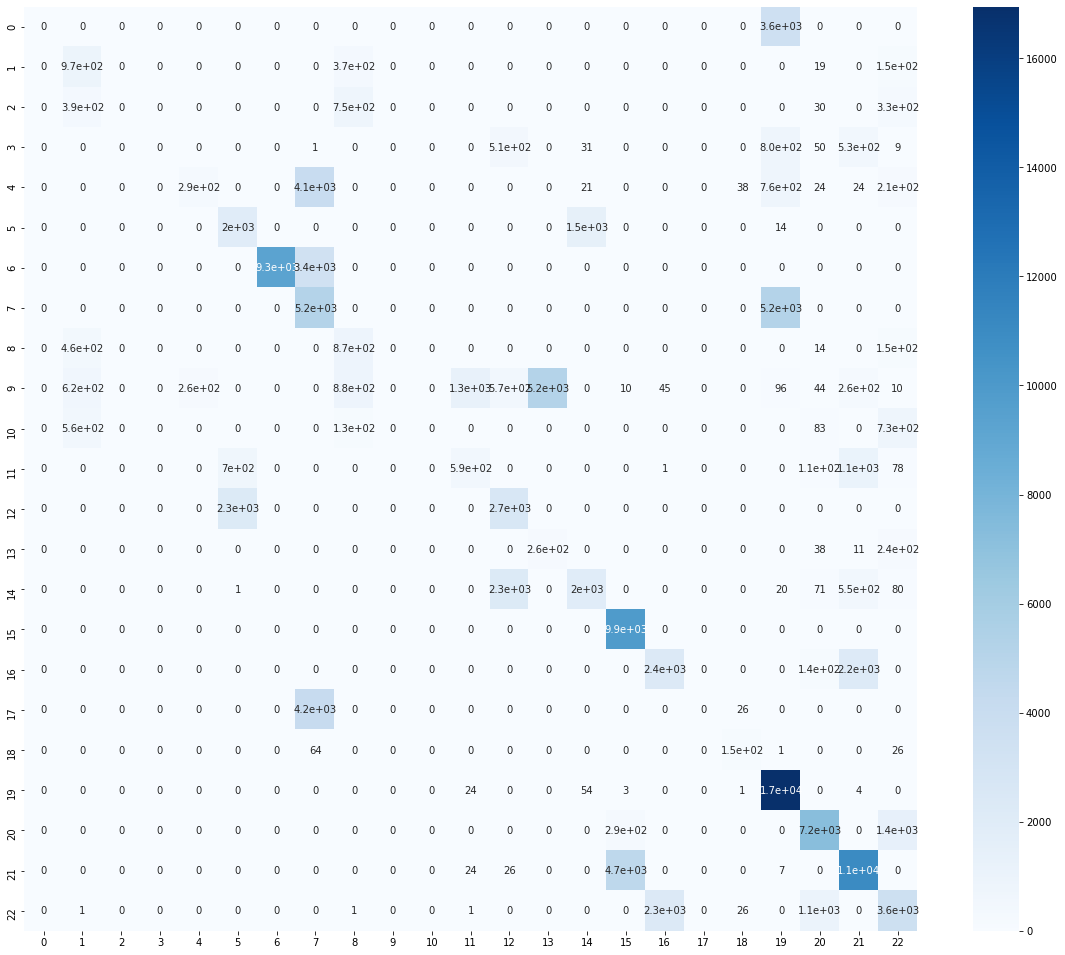

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
df.dropna(inplace=True)
cf_matrix = confusion_matrix(df2['next_event'], df2['predicted_next_event'], labels=labelsd)
fig, ax = plt.subplots(figsize=(20,17)) 
sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax=ax)

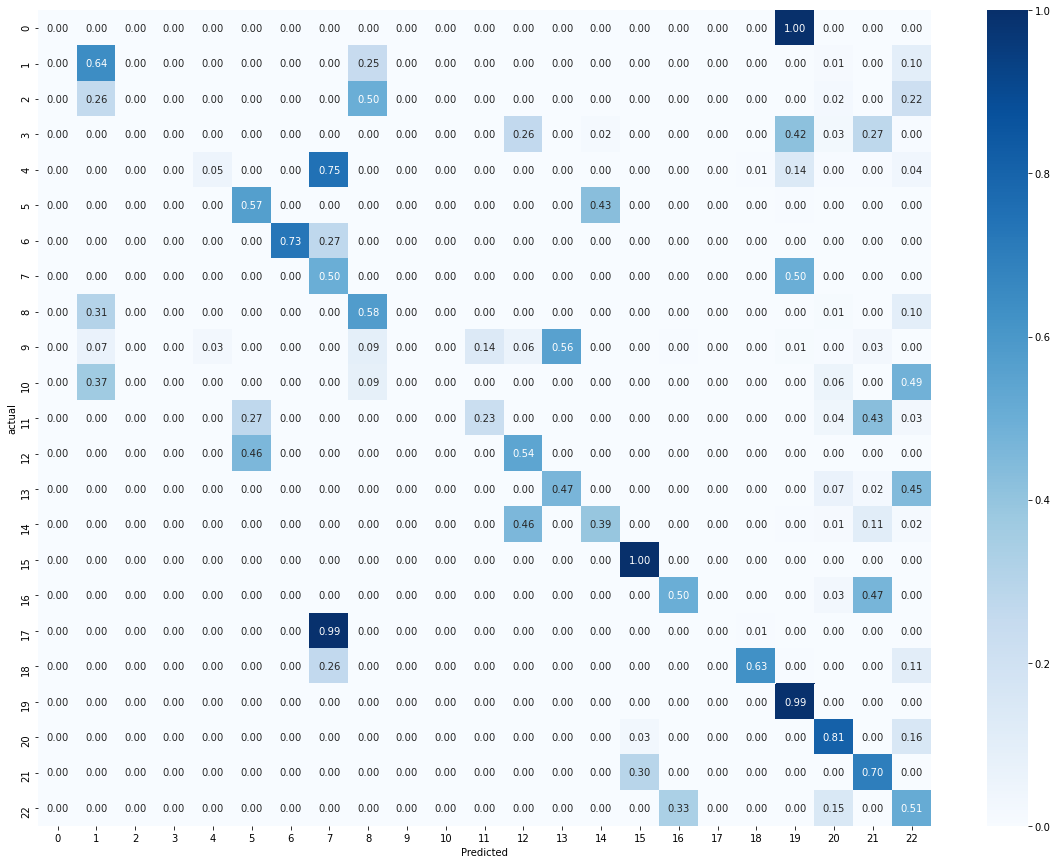

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_test = df2['next_event']
y_pred = df2['predicted_next_event']
labels = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred, labels=labels)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(cmn, annot=True, fmt='.2f', cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('actual')
plt.show(block=False)

In [59]:
df.groupby('next_event').describe()

case:concept:name                              \
                                           count           mean          std   
next_event                                                                     
A_ACCEPTED                                3552.0  200472.634291  8073.654211   
A_ACTIVATED                               1505.0  199859.603322  7848.588894   
A_APPROVED                                1501.0  199881.431046  7847.623482   
A_CANCELLED                               1939.0  198880.436823  7492.095587   
A_DECLINED                                5438.0  199612.653365  8430.751399   
A_FINALIZED                               3480.0  200462.277874  8078.531544   
A_PARTLYSUBMITTED                        12701.0  199896.345957  8296.661910   
A_PREACCEPTED                            10346.0  200385.722405  8134.470177   
A_REGISTERED                              1501.0  199881.431046  7847.623482   
A_SUBMITTED                               9276.0  200000.832471  8335.504333   
O_ACCEPTED                                1502.0  199888.657790  7846.730138   
O_CANCELLED                               2578.0  199445.025989  7403.878832   
O_CREATED                                 4956.0  200389.973366  7906.000505   
O_DECLINED                                 550.0  199840.187273  7682.408315   
O_SELECTED                                4957.0  200389.586443  7905.249783   
O_SENT                                    9911.0  200390.166885  7905.977026   
O_SENT_BACK                               4734.0  200338.683566  7967.447734   
W_Afhandelen leads                        4257.0  199674.332159  8075.324406   
W_Beoordelen fraude                        244.0  200476.639344  8411.527975   
W_Completeren aanvraag                   17031.0  200442.537432  8171.613528   
W_Nabellen incomplete dossiers            8905.0  199578.208647  7709.055939   
W_Nabellen offertes                      15735.0  199210.382777  7719.805752   
W_Valideren aanvraag                      6979.0  200103.589483  7763.019160   

                                                                          \
                                     min        25%       50%        75%   
next_event                                                                 
A_ACCEPTED                      185584.0  193796.50  200563.0  207137.75   
A_ACTIVATED                     185617.0  193419.00  199543.0  206300.00   
A_APPROVED                      185617.0  193455.00  199579.0  206309.00   
A_CANCELLED                     185569.0  192756.50  198481.0  205039.50   
A_DECLINED                      185572.0  192069.25  199574.5  207078.50   
A_FINALIZED                     185584.0  193772.50  200533.0  207137.75   
A_PARTLYSUBMITTED               185572.0  192695.00  199932.0  207008.00   
A_PREACCEPTED                   185584.0  193482.00  200454.0  207275.00   
A_REGISTERED                    185617.0  193455.00  199579.0  206309.00   
A_SUBMITTED                     185569.0  192775.25  199978.5  207236.75   
O_ACCEPTED                      185617.0  193458.00  199621.0  206306.75   
O_CANCELLED                     185584.0  193656.00  199078.5  205379.00   
O_CREATED                       185584.0  194043.00  200374.0  206763.00   
O_DECLINED                      185629.0  192925.50  200245.0  206209.25   
O_SELECTED                      185584.0  194043.00  200374.0  206763.00   
O_SENT                          185584.0  194043.00  200374.0  206763.00   
O_SENT_BACK                     185617.0  193810.00  200442.0  206858.25   
W_Afhandelen leads              185584.0  192791.00  199971.0  206135.00   
W_Beoordelen fraude             185777.0  194031.25  198774.0  209918.75   
W_Completeren aanvraag          185569.0  193683.00  200442.0  207503.00   
W_Nabellen incomplete dossiers  185617.0  192650.00  199273.0  206141.00   
W_Nabellen offertes             185584.0  192656.00  198945.0  205514.00   
W_Valideren aanvraag            185617.0  193974.0

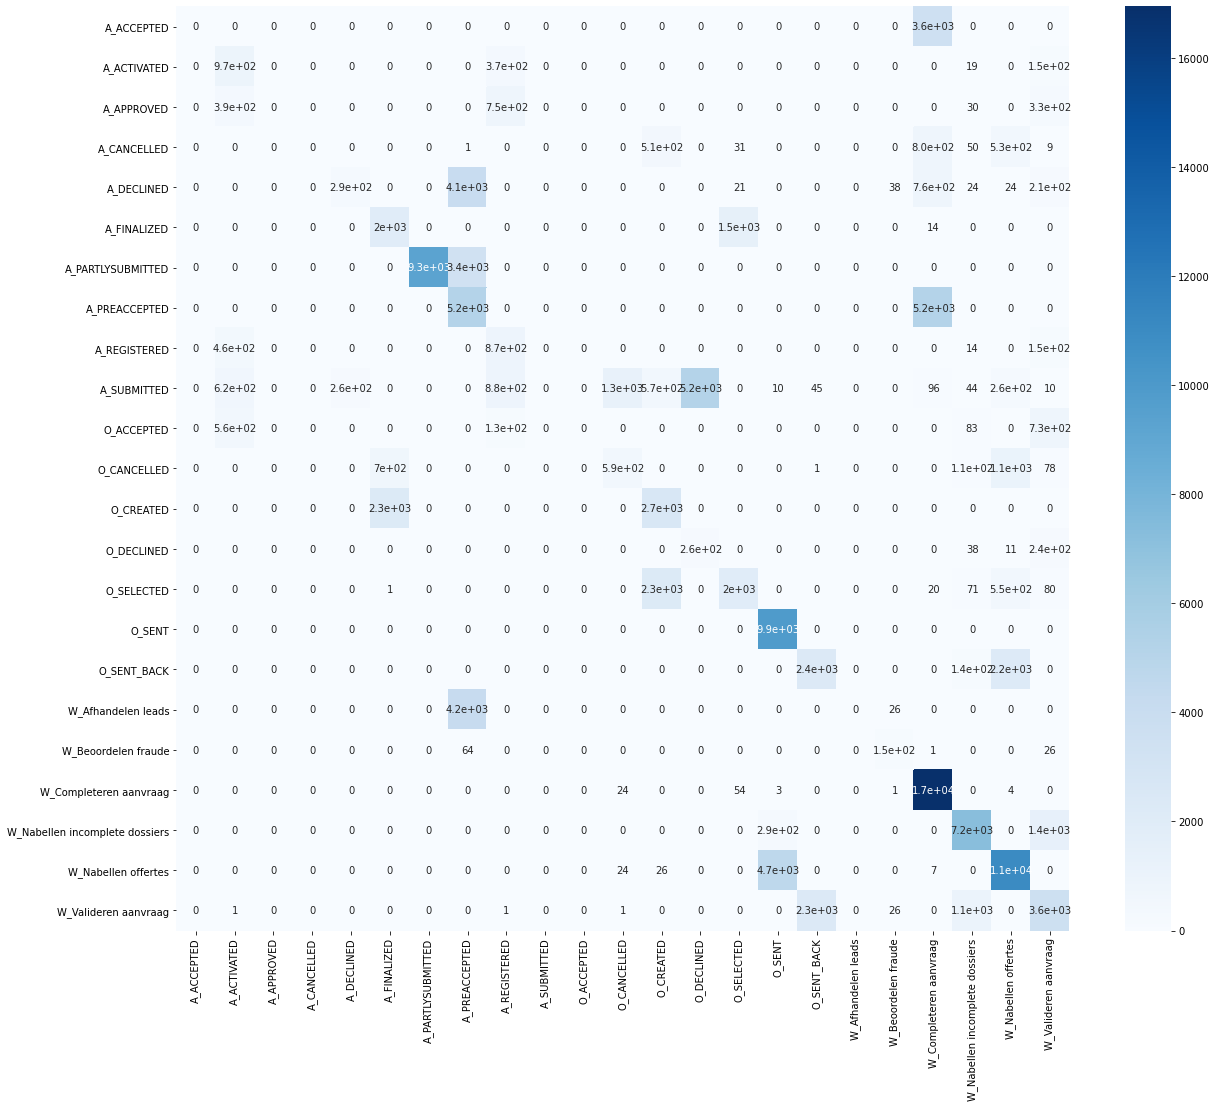

In [89]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
y_test = df2['next_event']
y_pred = df2['predicted_next_event']
labels = np.unique(y_test)
a =  confusion_matrix(y_test, y_pred, labels=labels)
fig, ax = plt.subplots(figsize=(20,17)) 
cmd = pd.DataFrame(a, index=labels, columns=labels)
sns.heatmap(cmd, annot=True, cmap='Blues', ax=ax)
fig.savefig('confusionmatrix.png')


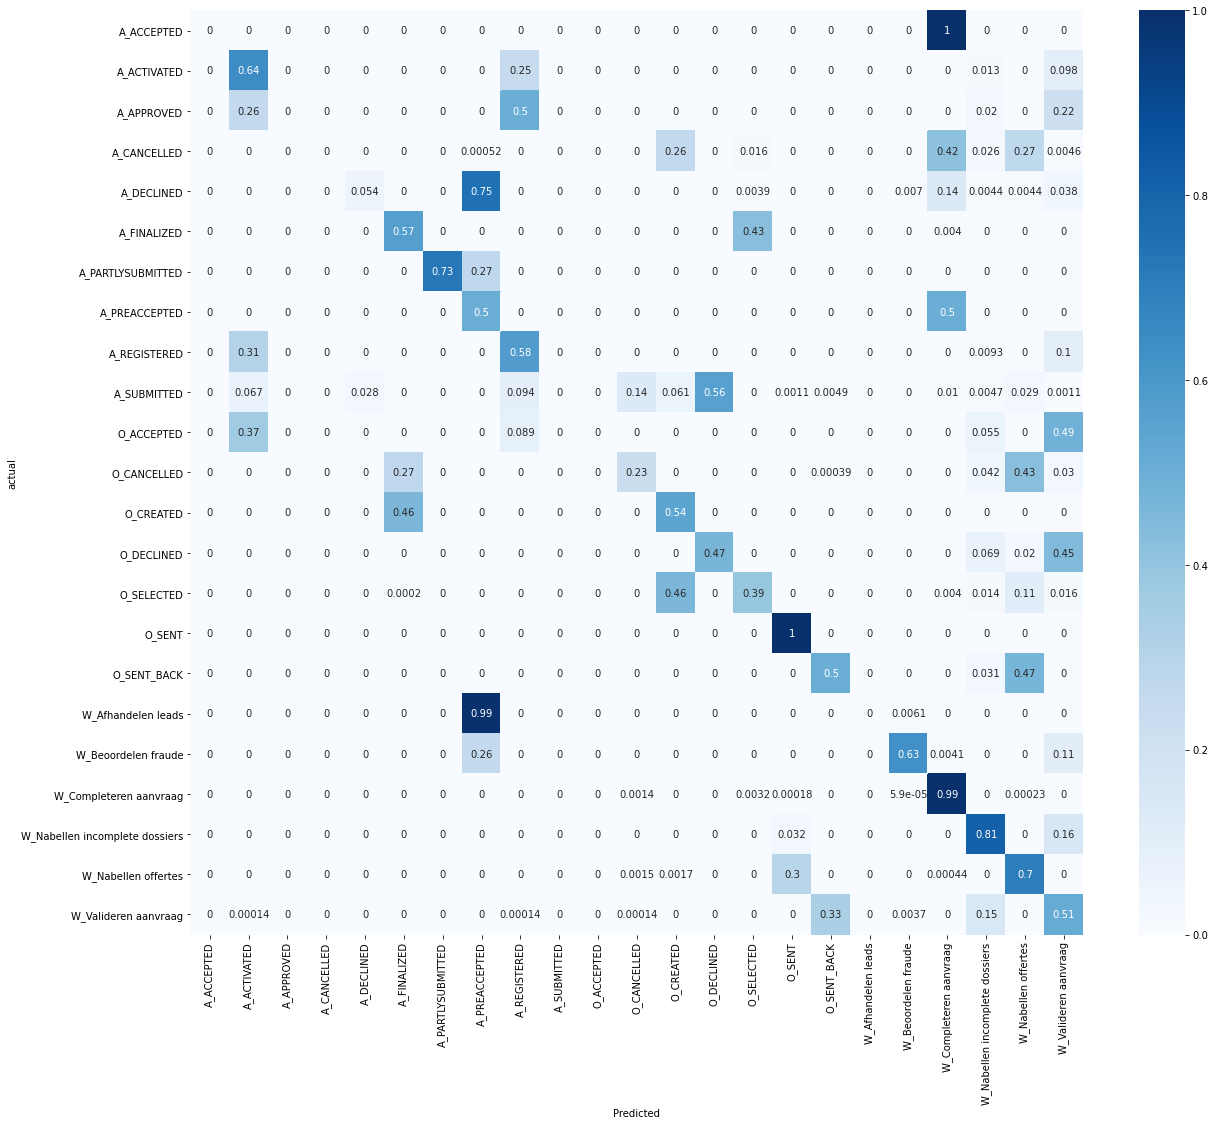

In [94]:
cmdn = cmd.div(cmd.sum(axis=1), axis=0)
cmdn
fig, ax = plt.subplots(figsize=(20,17)) 
sns.heatmap(cmdn, annot=True, cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('actual')
fig.savefig('norm_confusion_matrix.png', dpi=300)